**Gradient Descent**

Gradient descent is an optimization algorithm used to find the minimum of a cost function. In machine learning loss functions are things like mean squared error, cross entropy. When we talk about optimization, we use gradient descent to find the values of our parameters of interest that produce the smallest error (loss). Assuming we have the function below

Y = **theta** * X + **b**,

where Y is predicted from our x values and **theta** and **b** are our parameters.

The above equation will give us predicted Y-values for every X-value. When we compare this predicted values to our real values we may be off by some amount. In linear regression we call this **off amount** the residuals. If we take the sum of our squared resiuals and divide by the total number of observations, this should give us our mean squared error which is a **loss function**. 
 Our goal for example may be to find the theta values that produce the lowest mean squared error. The picture below shows how we would do this

 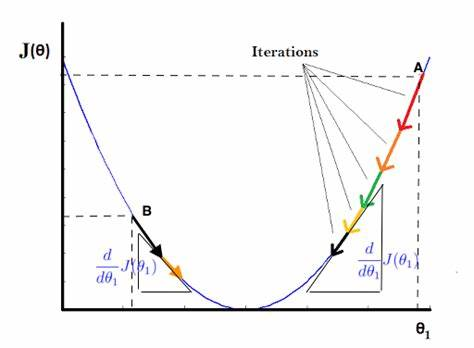

In [57]:
import numpy as np
import matplotlib.pyplot as plt

We build a function to calculate the mean squared error for us. This mean squared error will be our loss function.

In [58]:
def loss_function(y_pred, y_true):
  square_loss = 0
  for tr, pr in zip(y_true, y_pred):
    residuals_square = np.square(tr-pr)
    square_loss += residuals_square
  return square_loss/len(y_pred)




---


In real life we do not know the function that generates our data (data generating proces). However, in this case let us be omniscient. We create a function that generates some data for us. This function is y = theta*X + b, the true value of theta=5, b= -1.

In [59]:
X_values = np.random.normal(size=100) 
Y_true = np.array(5*X_values - 1) 
print(Y_true)

[ -1.42982198  -6.52128714  -1.29846333  -1.14219474  -5.72238835
  -1.54079561 -12.32609539  -4.09156644  -0.38317696 -11.42876219
   4.73315189   4.02102609  -5.22679916   0.10728906   5.95100937
   2.08937432  -0.57891799  -9.40011667  -4.06062758   4.16253421
  -5.22810497   7.81238039  -3.08962723   0.38022502  -2.19913943
  -7.61128049   1.20340643   5.51437421  -1.10865762  -2.97761403
  -4.86388643 -10.87115892  -4.38053656  -4.72681502  -7.43735672
  -8.18378476  -4.12098376  -5.04731788  -0.03478394   2.64466386
  -1.82519718  -2.68182817  -4.56687418  -0.57784414  -1.1884992
  -4.06018541  13.267328    -7.35893644  -2.04184422  -1.08960934
   1.56083271  -6.31306875   0.956795     1.06423362   1.9776755
  -7.56242118   4.47799622  -4.71581154   5.18333369   3.96552651
  -5.73129308   8.0558779    0.12293696  -6.03432834 -19.29171238
   0.67414295  -3.06609578   7.4411948    7.33691762   4.46058387
  -1.50175189   0.12848454  -3.58779498  -9.34781592  -2.99806008
   2.3014418

In [60]:
def base_line(x, y, m=np.arange(-5, 10, 1)):
  theta_base = []
  loss_base = []
  for theta in m:
    y_pred = np.array(theta*x - 1)
    loss_base.append(loss_function(y, y_pred)) 
    theta_base.append(theta)
  return theta_base, loss_base
theta_base, loss_base = base_line(y=Y_true, x=X_values)

In [61]:
def gradient_descent(x, y, learning_rate=0.01, max_iter=1000, theta_init=-10):
  theta_value = theta_init
  loss = np.infty
  loss_history = []
  theta_history = []
  for _ in range(0, max_iter):
    theta_history.append(theta_value)
    loss_history.append(loss)
    y_pred = theta_value*x -1
    current_loss = loss_function(y_pred, y)
    grad = -2/len(y) * (np.dot(x, (y-y_pred)))
    theta_value -= learning_rate*grad
    if current_loss < loss:
      loss = current_loss
    else:
      break
  
  return theta_value, loss, loss_history, theta_history


theta, loss, loss_his, theta_his = gradient_descent(x= X_values, y=Y_true, max_iter=1000)


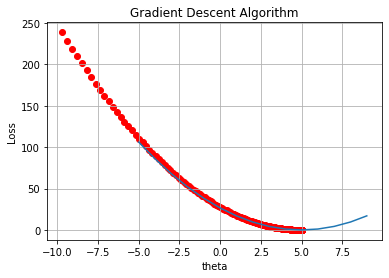

In [62]:
def plot_gradient_descent(losses, thetas):
  plt.plot(theta_base, loss_base)
  plt.scatter(thetas, losses, c='r')
  plt.grid()
  plt.xlabel('theta')
  plt.ylabel('Loss')
  plt.title('Gradient Descent Algorithm')
  plt.show()

plot_gradient_descent(loss_his, theta_his)

Play with the learning rate in the function above and see how the gradient descent looks different